# Generate sample from 2D GZ with Euler-Maruyama

Saved data at iteration 0, total violation is 0
Saved data at iteration 1, total violation is 0
Saved data at iteration 2, total violation is 0
Saved data at iteration 3, total violation is 0
Saved data at iteration 4, total violation is 0
Saved data at iteration 5, total violation is 0
Saved data at iteration 6, total violation is 0
Saved data at iteration 7, total violation is 0
Saved data at iteration 8, total violation is 0
Saved data at iteration 9, total violation is 0
Saved data at iteration 10, total violation is 0
Saved data at iteration 11, total violation is 0
Saved data at iteration 12, total violation is 0
Saved data at iteration 13, total violation is 0
Saved data at iteration 14, total violation is 0
Saved data at iteration 15, total violation is 0
Saved data at iteration 16, total violation is 0
Saved data at iteration 17, total violation is 0
Saved data at iteration 18, total violation is 0
Saved data at iteration 19, total violation is 0
Saved data at iteration 20, to

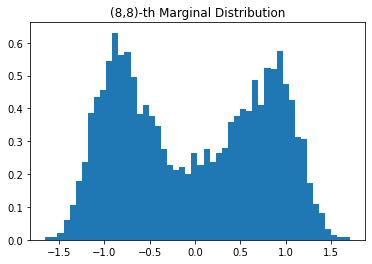

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

# Given constants
n = 8
d = n**2
h = 1 / (n + 1)
λ = 0.03
β = 1/5
dt = 0.003
N = int(1/dt)  # Interested in T = 1
dt = 1/N  # Correct for small deviation

BATCH_SIZE = 100  # Set your desired batch size

data_path = f"./Saved_Data/2D_GZ_data_d_{d}.npz"

# Hyperparameters
hyperparameters = {
    "d": d,
    "h": h,
    "λ": λ,
    "β": β,
    "dt": dt,
    "N": N,
    "BATCH_SIZE": BATCH_SIZE
}

# Create directory if it doesn't exist
if not os.path.exists("./Saved_Data"):
    os.makedirs("./Saved_Data")

# Load existing data or initialize
if os.path.exists(data_path):
    with np.load(data_path) as data:
        all_samples = data['samples']
else:
    all_samples = np.empty((0, n + 2, n + 2))

def V_grad(U):
    """
    Compute the gradient of the potential energy V for a periodic domain.
    
    Args:
    - U (np.ndarray): Input tensor for which the gradient is computed.
    
    Returns:
    - np.ndarray: Gradient of the potential energy V.
    """
    return (np.pi*λ / (2*h**2)) * (
        4*U - np.roll(U, 1, axis=1) - np.roll(U, -1, axis=1) - np.roll(U, 1, axis=2) - np.roll(U, -1, axis=2)
    ) - U * (1 - U**2) /λ

count = 0

for iteration in range(60):

    U = np.zeros((BATCH_SIZE, n + 2, n + 2))  # Initialize at each iteration

    # Creating samples for 1D Ginzburg Landau
    for _ in range(N):
        dW = np.sqrt(dt) * np.random.randn(BATCH_SIZE, n + 2, n + 2)
        U[:, 1:-1, 1:-1] += (-V_grad(U)[:, 1:-1, 1:-1] * dt + np.sqrt(2/β) * dW[:, 1:-1, 1:-1])
        count += np.sum(U > 2.5) + np.sum(U <-2.5)
        U[U > 2.5] = 2.5
        U[U < -2.5] = -2.5
    all_samples = np.concatenate((all_samples, U), axis=0)
    print(f'Saved data at iteration {iteration}, total violation is {count}')
    
    # Save the accumulated data
    np.savez(data_path, samples=all_samples, hyperparameters=hyperparameters)

# Visualization of the 8-th marginal distribution
eighth_samples = all_samples[:, 2, 2]  # Extract the 8-th bit from each sample
plt.hist(eighth_samples, bins=50, density=True)
plt.title("(8,8)-th Marginal Distribution")
plt.show()
